### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [1]:
# Write Your Code Below
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Save the data to a DataFrame object.
#get url
url= 'http://covid19.ncdc.gov.ng/'
page = requests.get(url)

In [3]:
#using beautifulsoup to get the table
soup = BeautifulSoup(page.text, 'lxml')
table1 = soup.find('table', id='custom1')


In [4]:
#getting the headers
headers = []
for i in table1.find_all('th'):
    title = i.text
    headers.append(title)

print(headers)

['States Affected', 'No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths']


In [5]:
#set headers of the dataframe
mydata = pd.DataFrame(columns = headers)

In [6]:
#extracting the elements of the table
body = []
for j in table1.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [i.text for i in row_data]
    body.append(row)

In [7]:
#join the elements and header to form a dataframe
df_ncdc = pd.DataFrame(body, columns=headers)

### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [8]:
#Global Daily Confirmed Cases
df_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv",index_col=False)


In [9]:
#Global Daily Recovered Cases
df_recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv",index_col=False)


In [10]:
#Global Daily Death Cases
df_death = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv",index_col=False)


### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [11]:
#covid external data
df_external = pd.read_csv("covid_external.csv")

In [12]:
#covid budget data
df_budget = pd.read_csv("Budget_data.csv")

In [13]:
#Nigeria gdp before and during covid
df_realgdp = pd.read_csv("RealGDP.csv")


### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

A. NCDC DATA

In [14]:
#view the extracted ncdc dataset
df_ncdc.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,\nLagos\n,"102,877\n",129\n,"101,977\n",771\n
1,\nFCT\n,"29,075\n",146\n,"28,680\n",249\n
2,\nRivers\n,"17,680\n",262\n,"17,264\n",154\n
3,\nKaduna\n,"11,467\n",11\n,"11,367\n",89\n
4,\nOyo\n,"10,327\n",6\n,"10,119\n",202\n


In [15]:
df_ncdc.describe()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
count,37,37,37,37,37
unique,37,37,29,37,30
top,\nEdo\n,"4,973\n",0\n,"2,373\n",28\n
freq,1,1,4,1,3


In [16]:
df_ncdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


B - John Hopkins Data Repository

In [17]:
#view Global Daily Confirmed Cases 
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/13/22,8/14/22,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,188820,189045,189343,189477,189710,190010,190254,190435,190643,191040
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,321345,321804,322125,322837,323282,323829,325241,325736,326077,326181
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,269008,269141,269269,269381,269473,269556,269650,269731,269805,269894
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45899,45899,45899,45899,45975,45975,45975,45975,45975,45975
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636


In [18]:
#view Global Daily Recovered Cases
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/13/22,8/14/22,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Columns: 948 entries, Province/State to 8/22/22
dtypes: float64(2), int64(944), object(2)
memory usage: 2.0+ MB


In [20]:
df_recovered.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/13/22,8/14/22,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22
count,269.000000,269.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,...,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0
mean,18.780459,27.559863,0.111111,0.118519,0.144444,0.155556,0.207407,0.240741,0.400000,0.470370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,25.317941,73.731526,1.707916,1.711765,1.900271,1.963862,2.587060,2.781612,4.902317,5.392154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.535300,-9.429499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,19.856270,23.881300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,39.305400,95.956000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,71.706900,178.065000,28.000000,28.000000,31.000000,32.000000,42.000000,45.000000,80.000000,88.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#view Global Daily Death Cases
df_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/13/22,8/14/22,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7758,7758,7759,7759,7759,7759,7759,7759,7762,7767
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3570,3571,3571,3573,3574,3574,3575,3576,3576,3576
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6878,6878,6878,6878,6878,6878,6878,6878,6878,6878
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,154,154,154,154,154,154,154,154,154,154
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917


In [22]:
df_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 948 entries, Province/State to 8/22/22
dtypes: float64(2), int64(944), object(2)
memory usage: 2.1+ MB


In [23]:
df_death.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/13/22,8/14/22,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22
count,287.000000,287.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02
mean,20.648433,21.965908,0.058824,0.062284,0.089965,0.145329,0.193772,0.283737,0.453287,0.460208,...,2.303629e+04,2.303937e+04,2.304727e+04,2.305892e+04,2.306997e+04,2.307998e+04,2.308912e+04,2.309280e+04,2.309849e+04,2.233614e+04
std,25.948012,75.547823,1.000000,1.001525,1.413797,2.353998,3.060245,4.471644,7.353103,7.353616,...,8.910965e+04,8.911306e+04,8.914247e+04,8.917361e+04,8.922936e+04,8.926543e+04,8.929807e+04,8.930275e+04,8.933622e+04,8.880486e+04
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,5.006283,-17.165450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,5.200000e+01
50%,22.166700,20.168300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,8.410000e+02
75%,41.249990,84.745050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.780000e+03,8.780000e+03,8.780000e+03,8.800000e+03,8.800000e+03,8.800000e+03,8.808000e+03,8.808000e+03,8.808000e+03,8.456000e+03
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,1.037117e+06,1.037121e+06,1.037554e+06,1.038023e+06,1.039116e+06,1.039746e+06,1.040355e+06,1.040379e+06,1.041149e+06,1.040898e+06


c - EXTERNAL DATA

In [24]:
#view external data
df_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [25]:
df_external.describe()

,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
count,3.700000e+01,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000,37.000000
mean,5.843892e+06,0.502703,0.502703,0.500000,0.502703,0.502703,0.5,0.502703,0.502703,0.954054
std,2.622344e+06,0.301373,0.301373,0.299073,0.301373,0.301373,0.3,0.301373,0.301373,0.100539
min,2.606000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.790000
25%,4.272000e+06,0.300000,0.300000,0.300000,0.300000,0.300000,0.3,0.300000,0.300000,0.870000
50%,5.185000e+06,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.930000
75%,6.376000e+06,0.800000,0.800000,0.700000,0.800000,0.800000,0.8,0.800000,0.800000,1.040000
max,1.472600e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.140000


In [26]:
df_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [27]:
#view Nigeria budget
df_budget.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [28]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [29]:
df_budget.describe()

,Initial_budget (Bn),Revised_budget (Bn)
count,37.00000,37.000000
mean,276.22027,171.092432
std,299.37630,142.974439
min,108.00000,62.960000
25%,152.92000,108.300000
50%,183.30000,128.800000
75%,242.18000,174.000000
max,1680.00000,920.500000


In [30]:
#view Nigeria GDP
df_realgdp.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [31]:
df_realgdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


In [32]:
df_realgdp.describe()

,Year,Q1,Q2,Q3,Q4
count,7.000000,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,2017.000000,1.607174e+07,1.635760e+07,1.788093e+07,1.600959e+07
std,2.160247,4.225676e+05,3.423407e+05,3.442170e+05,7.075830e+06
min,2014.000000,1.543868e+07,1.589000e+07,1.747913e+07,0.000000e+00
25%,2015.500000,1.587084e+07,1.615158e+07,1.765783e+07,1.818195e+07
50%,2017.000000,1.605060e+07,1.633472e+07,1.782000e+07,1.853375e+07
75%,2018.500000,1.626560e+07,1.652192e+07,1.802879e+07,1.881975e+07
max,2020.000000,1.674000e+07,1.693143e+07,1.849411e+07,1.953000e+07


### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

A - NCDC

In [33]:
#remove all \n in the df
df_ncdc=df_ncdc.apply(lambda x: x.str.strip())

In [34]:
#rename columns
df_ncdc = df_ncdc.rename(columns={'States Affected':'states', 'No. of Cases (Lab Confirmed)':'lab_confirmed_cases','No. of Cases (on admission)':'cases_on_admission','No. Discharged':'discharged','No. of Deaths':'death'})

In [35]:
#remove all commas(,)
str_cols = ['lab_confirmed_cases','cases_on_admission','discharged','death']
df_ncdc[str_cols] = df_ncdc[str_cols].replace(',', '', regex=True)


In [36]:
#convert columns to appropriate datatype
dict = {'lab_confirmed_cases':int,'cases_on_admission':int,'discharged':int,'death':int}
df_ncdc = df_ncdc.astype(dict)

In [37]:
#confirm all corrections
df_ncdc.head()

,states,lab_confirmed_cases,cases_on_admission,discharged,death
0,Lagos,102877,129,101977,771
1,FCT,29075,146,28680,249
2,Rivers,17680,262,17264,154
3,Kaduna,11467,11,11367,89
4,Oyo,10327,6,10119,202


B - John Hopkins Data Repository

In [38]:
#extract Nigeria's data from confirmed cases and drop necessary columns
df_confirmed_nig=df_confirmed.loc[df_confirmed['Country/Region']=='Nigeria']
df_confirmed_nig = df_confirmed_nig.drop(['Province/State','Country/Region','Lat','Long'],axis=1)

In [39]:
#transpose dataset 
df_confirmed_nig_t = df_confirmed_nig.T


In [40]:
#change index to column name
df_confirmed_nig_t=df_confirmed_nig_t.rename(columns = {204:'confirmed_cases'})

In [41]:
#confirm all corrections
df_confirmed_nig_t.head()

,confirmed_cases
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [42]:
#extract Nigeria's data from recovered cases and drop necessary columns
df_recovered_nig=df_recovered.loc[df_recovered['Country/Region']=='Nigeria']
df_recovered_nig = df_recovered_nig.drop(['Province/State','Country/Region','Lat','Long'],axis=1)

In [43]:
#transpose dataset and change column name
df_recovered_nig_t = df_recovered_nig.T
df_recovered_nig_t = df_recovered_nig_t.rename(columns = {189:'recovered_cases'})

In [44]:
#confirm all changes
df_recovered_nig_t.head()

,recovered_cases
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [45]:
#extract Nigeria's data from death cases and drop all necessary columns
df_death_nig=df_death.loc[df_death['Country/Region']=='Nigeria']
df_death_nig = df_death_nig.drop(['Province/State','Country/Region','Lat','Long'],axis=1)

In [46]:
#transpose dataset and change column name
df_death_nig_t = df_death_nig.T
df_death_nig_t=df_death_nig_t.rename(columns = {204:'death_cases'})

In [47]:
#confirm all changes
df_death_nig_t.head()

,death_cases
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


c - EXTERNAL DATA

In [48]:
#rename the df columns
df_budget = df_budget.rename(columns={'Initial_budget (Bn)':'initial_budget','Revised_budget (Bn)':'revised_budget'})

In [49]:
#confirm all corrections
df_budget.head()

,states,initial_budget,revised_budget
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [50]:
#load the external dataset
df_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [51]:
#rename columns
df_external = df_external.rename(columns={'states_affected':'states'})
df_external = df_external.rename(columns={'Overall CCVI Index':'overall_CCVI_index','Health System':'health_system','Socio-Economic':'socio_economic','Transport Availability':'transport_availability','Population Density':'population_density','Acute IHR':'acute_IHR'})

In [52]:
#confirm rename
df_external.head()

,states,region,Population,overall_CCVI_index,Age,Epidemiological,Fragility,health_system,population_density,socio_economic,Transport Availability,acute_IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [53]:
#load the realgdp dataset
df_realgdp.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [54]:
#sort the ncdc dataset by lab_confirmed_cases in descending order
df_ncdc.sort_values(by='lab_confirmed_cases', ascending=False).head()

,states,lab_confirmed_cases,cases_on_admission,discharged,death
0,Lagos,102877,129,101977,771
1,FCT,29075,146,28680,249
2,Rivers,17680,262,17264,154
3,Kaduna,11467,11,11367,89
4,Oyo,10327,6,10119,202


In [55]:
#select only the top 10 states
df_ncdc_confirmed = df_ncdc[0:10]
df_ncdc_confirmed

,states,lab_confirmed_cases,cases_on_admission,discharged,death
0,Lagos,102877,129,101977,771
1,FCT,29075,146,28680,249
2,Rivers,17680,262,17264,154
3,Kaduna,11467,11,11367,89
4,Oyo,10327,6,10119,202
5,Plateau,10292,18,10199,75
6,Edo,7821,102,7398,321
7,Ogun,5810,11,5717,82
8,Delta,5631,349,5170,112
9,Ondo,5173,315,4749,109


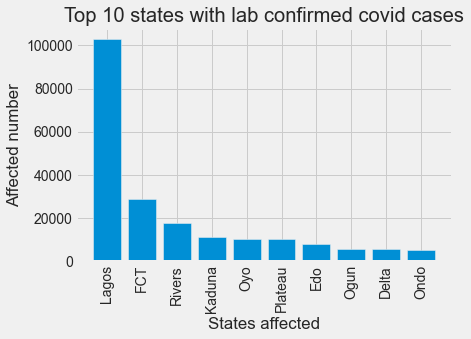

In [56]:
#plot the top 10 states
plt.bar(df_ncdc_confirmed.states,df_ncdc_confirmed.lab_confirmed_cases)
plt.xlabel('States affected')
plt.ylabel('Affected number')
plt.title('Top 10 states with lab confirmed covid cases')
plt.xticks(rotation=90)
plt.show()

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

In [57]:
#sort according to the discharged cases in descending order
df_ncdc_discharged = df_ncdc.sort_values(by='discharged', ascending=False)
df_ncdc_discharged.head()

,states,lab_confirmed_cases,cases_on_admission,discharged,death
0,Lagos,102877,129,101977,771
1,FCT,29075,146,28680,249
2,Rivers,17680,262,17264,154
3,Kaduna,11467,11,11367,89
5,Plateau,10292,18,10199,75


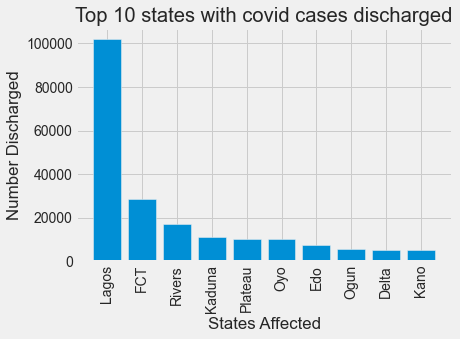

In [58]:
#plot the top 10 discharged states
plt.bar(df_ncdc_discharged.states[0:10],df_ncdc_discharged.discharged[0:10])
plt.xlabel('States Affected')
plt.ylabel('Number Discharged')
plt.title('Top 10 states with covid cases discharged')
plt.xticks(rotation=90)
plt.show()

TODO D - Plot the top 10 Death cases

In [59]:
#sort according to the highest death cases in descending order
df_ncdc_death = df_ncdc.sort_values(by='death', ascending=False)
df_ncdc_death.head()

,states,lab_confirmed_cases,cases_on_admission,discharged,death
0,Lagos,102877,129,101977,771
6,Edo,7821,102,7398,321
1,FCT,29075,146,28680,249
4,Oyo,10327,6,10119,202
2,Rivers,17680,262,17264,154


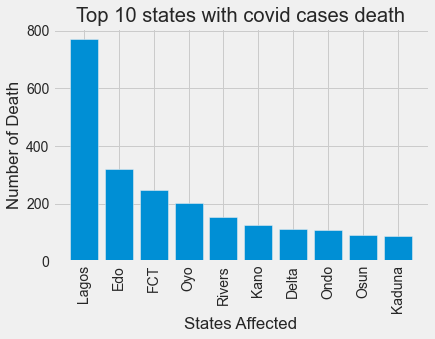

In [60]:
#plot the top 10 death cases
plt.bar(df_ncdc_death.states[0:10],df_ncdc_death.death[0:10])
plt.xlabel('States Affected')
plt.ylabel('Number of Death')
plt.title('Top 10 states with covid cases death')
plt.xticks(rotation=90)
plt.show()

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

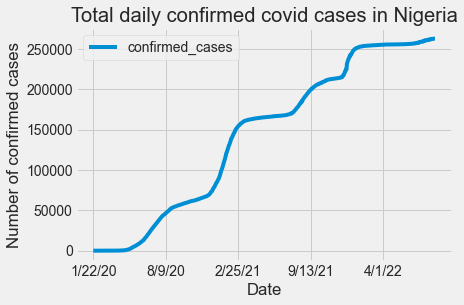

In [61]:
#Total daily confirmed cases in Nigeria
df_confirmed_nig_t.plot.line()
plt.title('Total daily confirmed covid cases in Nigeria')
plt.xlabel('Date')

plt.ylabel('Number of confirmed cases')
plt.show()

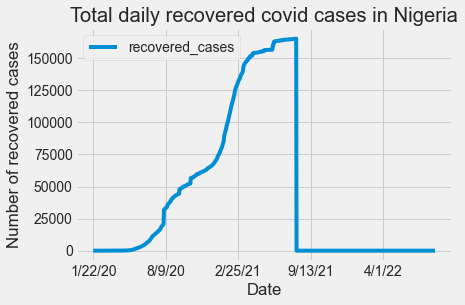

In [62]:
#Total daily recovered cases in Nigeria
df_recovered_nig_t.plot.line()
plt.title('Total daily recovered covid cases in Nigeria')
plt.xlabel('Date')
plt.ylabel('Number of recovered cases')
plt.show()

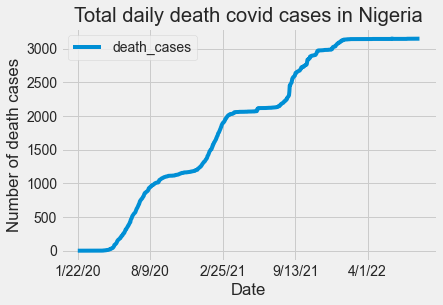

In [63]:
#Total daily death cases in Nigeria
df_death_nig_t.plot.line()
plt.title('Total daily death covid cases in Nigeria')
plt.xlabel('Date')
plt.ylabel('Number of death cases')
plt.show()

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

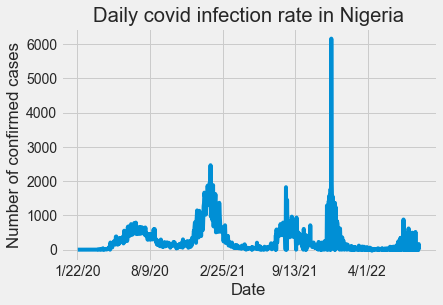

In [64]:
#Daily infection rate
df_rate=df_confirmed_nig_t.sum(axis='columns').diff().plot(grid=True)
plt.title('Daily covid infection rate in Nigeria')
plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.show()

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [65]:
#maximum infection rate for a day
df_confirmed_nig_t['confirmed_cases'].diff().max()

6158.0

In [66]:
#date of the maximum infection rate
df_confirmed_nig_t['confirmed_cases'].diff().idxmax()

'12/22/21'

TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [67]:
#merging the ncdc, external dataframe and selecting only the required columns for analysis
df_ncdc_vi = pd.merge(df_ncdc,df_external,on='states')
df_ncdc_VI = df_ncdc_vi[['states','lab_confirmed_cases','overall_CCVI_index']]
df_ncdc_VI.head()

,states,lab_confirmed_cases,overall_CCVI_index
0,Lagos,102877,0.0
1,FCT,29075,0.3
2,Rivers,17680,0.4
3,Kaduna,11467,0.7
4,Oyo,10327,0.2


In [68]:
#sorting based on confirmed cases
df_ncdc_VI=df_ncdc_VI.nlargest(10,'lab_confirmed_cases')
df_ncdc_VI

,states,lab_confirmed_cases,overall_CCVI_index
0,Lagos,102877,0.0
1,FCT,29075,0.3
2,Rivers,17680,0.4
3,Kaduna,11467,0.7
4,Oyo,10327,0.2
5,Plateau,10292,0.4
6,Edo,7821,0.1
7,Ogun,5810,0.3
8,Delta,5631,0.4
9,Ondo,5173,0.1


In [70]:
#create a copy of the dataset
df_ncdc_VI1 = df_ncdc_VI.copy()

In [71]:
#drop the states column
df_ncdc_VI2 = df_ncdc_VI1.drop('states',axis=1)

In [72]:
#import required library
from sklearn.preprocessing import MinMaxScaler

In [73]:
#scale the dataframe
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_ncdc_VI2.to_numpy())

In [74]:
#convert the scaled result(array) to dataframe
df_scaled = pd.DataFrame(df_scaled,columns=['lab_confirmed_cases','overall_CCVI_index'])

In [75]:
#join the scaled dataframe with the initial states column that was dropped
df_scaled = pd.concat((df_ncdc_VI1.states,df_scaled),1)
df_scaled

,states,lab_confirmed_cases,overall_CCVI_index
0,Lagos,1.000000,0.000000
1,FCT,0.244637,0.428571
2,Rivers,0.128009,0.571429
3,Kaduna,0.064419,1.000000
4,Oyo,0.052751,0.285714
5,Plateau,0.052393,0.571429
6,Edo,0.027102,0.142857
7,Ogun,0.006520,0.428571
8,Delta,0.004688,0.571429
9,Ondo,0.000000,0.142857


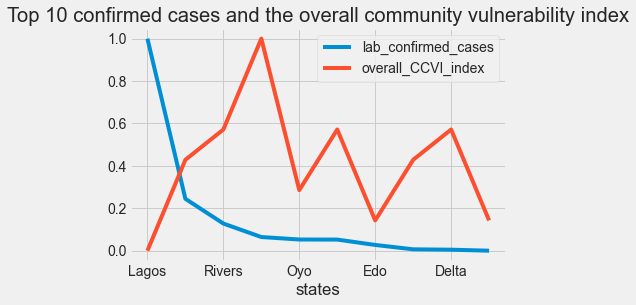

In [76]:
#plot the dataset
df_scaled.set_index('states').plot();
plt.title('Top 10 confirmed cases and the overall community vulnerability index');

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

In [77]:
#the merge dataframe from TODO H above
df_ncdc_vi.head()

,states,lab_confirmed_cases,cases_on_admission,discharged,death,region,Population,overall_CCVI_index,Age,Epidemiological,Fragility,health_system,population_density,socio_economic,Transport Availability,acute_IHR
0,Lagos,102877,129,101977,771,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,29075,146,28680,249,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,17680,262,17264,154,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11467,11,11367,89,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Oyo,10327,6,10119,202,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06


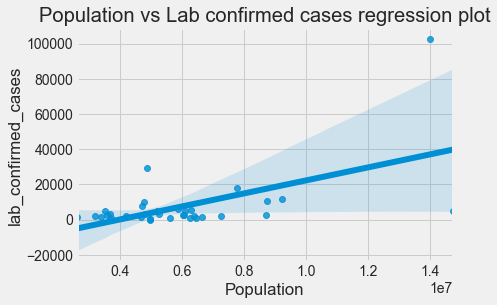

In [78]:
ax = sns.regplot(x="Population", y="lab_confirmed_cases", data=df_ncdc_vi)
plt.title('Population vs Lab confirmed cases regression plot');

-It is observed that the lab confirmed cases has a relatively linear relationship with the population of each state i.e the higher the population, the higher the chances of covid infection.

TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

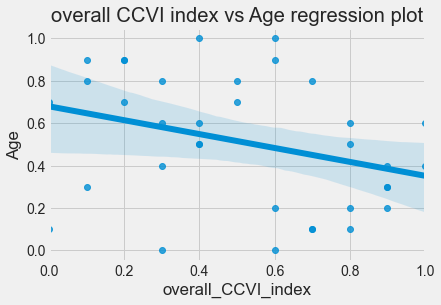

In [160]:
ax = sns.regplot(x="overall_CCVI_index", y="Age", data=df_ncdc_vi)
plt.title('overall CCVI index vs Age regression plot');

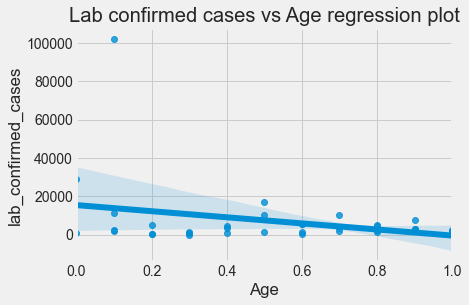

In [161]:
ax = sns.regplot(x="Age", y="lab_confirmed_cases", data=df_ncdc_vi)
plt.title('Lab confirmed cases vs Age regression plot');

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

In [114]:
#viewing the dataset
df_realgdp

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [130]:
#create a copy of the dataset
df_realgdp1=df_realgdp.copy()
df_realgdp1=df_realgdp1.set_index('Year')

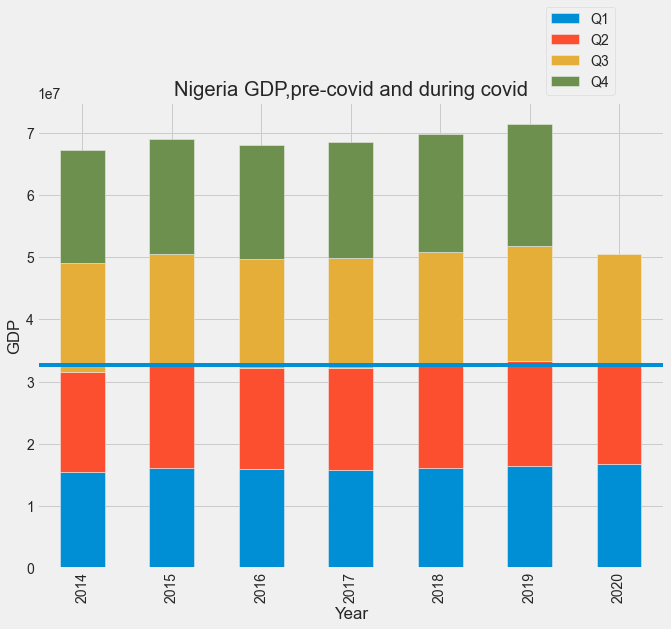

In [153]:
#plot of the Nigeria's GDP,pre-covid and during covid and drawing line through the 2020 Q2
ax=df_realgdp1.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.title('Nigeria GDP,pre-covid and during covid')
plt.ylabel('GDP')
ax.axhline(y=16740000.00+15890000.00)
plt.show()

OBSERVATIONS FROM THE PLOT

-It is observed that the GDP during and before covid for the Q1 and Q2 is relatively the same except in 2014 where the budget is very much lesser in Q2
-It is also observed that the GDP in Q3 of 2020 is very much same as the previous years except that of 2019 which is relatively larger. This is an indicaition that even at the advent of the covid, there was no much effect on Nigeria's GDP

In [156]:
df_realgdp.describe()

,Year,Q1,Q2,Q3,Q4
count,7.000000,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,2017.000000,1.607174e+07,1.635760e+07,1.788093e+07,1.600959e+07
std,2.160247,4.225676e+05,3.423407e+05,3.442170e+05,7.075830e+06
min,2014.000000,1.543868e+07,1.589000e+07,1.747913e+07,0.000000e+00
25%,2015.500000,1.587084e+07,1.615158e+07,1.765783e+07,1.818195e+07
50%,2017.000000,1.605060e+07,1.633472e+07,1.782000e+07,1.853375e+07
75%,2018.500000,1.626560e+07,1.652192e+07,1.802879e+07,1.881975e+07
max,2020.000000,1.674000e+07,1.693143e+07,1.849411e+07,1.953000e+07
